In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/train.csv
/kaggle/input/test.csv


In [2]:
train=pd.read_csv('../input/train.csv')
test=pd.read_csv('../input/test.csv')

In [3]:
print(train.info())
print(train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB
None
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   M

In [4]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


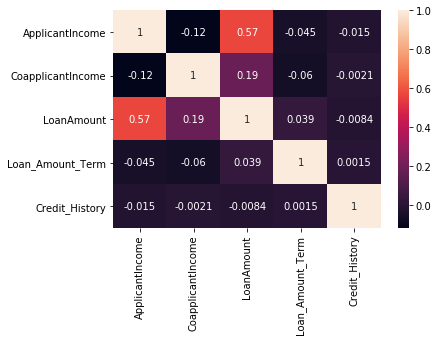

In [5]:
plt.figure()
sns.heatmap(train.corr(),annot=True)
plt.show()

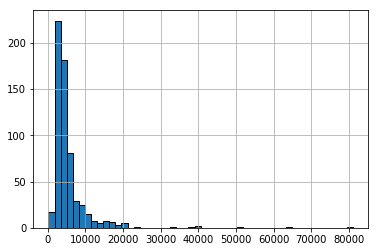

In [6]:
train.ApplicantIncome.hist(bins=50,edgecolor='black')

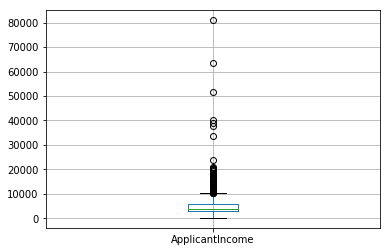

In [7]:
train.boxplot(column='ApplicantIncome')

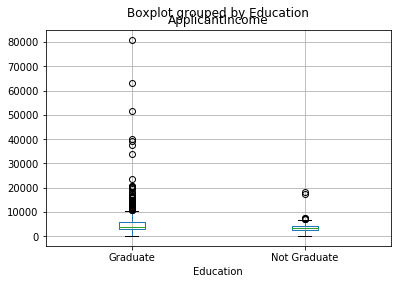

In [8]:
train.boxplot(column='ApplicantIncome',by='Education')

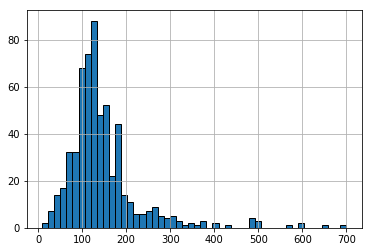

In [9]:
train.LoanAmount.hist(bins=50,edgecolor='black')

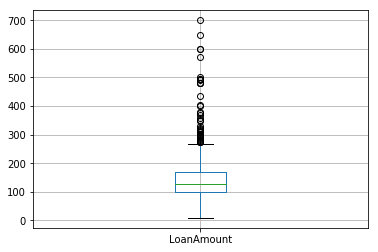

In [10]:
train.boxplot(column='LoanAmount')

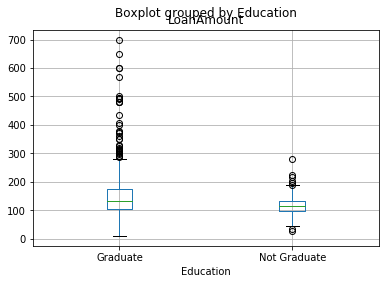

In [11]:
train.boxplot(column='LoanAmount',by='Education')

*Now, we have to study the relationship between the status of loan and the person's credit history. We will explore to find out how a person's credit history plays a part in getting his/her loan approved if at all it acts as an important factor!*

In [12]:
print('Credit History')
print(train.Credit_History.value_counts())
print('Loan Status')
print(train.Loan_Status.value_counts())

Credit History
1.0    475
0.0     89
Name: Credit_History, dtype: int64
Loan Status
Y    422
N    192
Name: Loan_Status, dtype: int64


*The following table shows the percentage (/100) of Approved Loans segregated on the basis of credit history. This can also be considered as a probability of getting the loan aproved.*

In [13]:
train.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


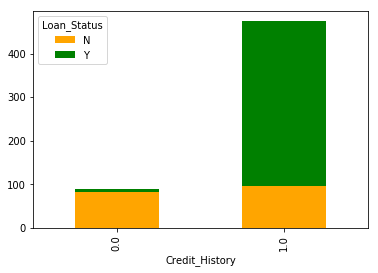

In [14]:
var1=pd.crosstab(index=train['Credit_History'],columns=train['Loan_Status'])
print(var1)
var1.plot(kind='bar',stacked='true',color=['orange','green'],grid=False)

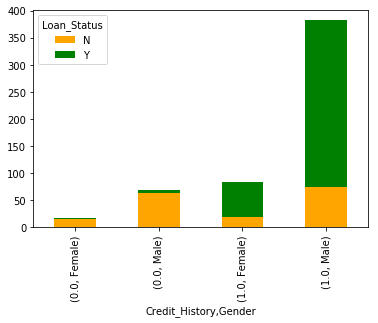

In [15]:
var2=pd.crosstab(index=[train['Credit_History'],train['Gender']],columns=train['Loan_Status'])
var2.plot(kind='bar',stacked='true',color=['orange','green'],grid=False)

Now, we have to handle the missing values.

In [16]:
train.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
train.Gender.fillna(train['Gender'].mode()[0],inplace=True)
train.Married.fillna(train['Married'].mode()[0],inplace=True)
train.Dependents.fillna(train['Dependents'].mode()[0],inplace=True)
train.Self_Employed.fillna(train['Self_Employed'].mode()[0],inplace=True)
train.Credit_History.fillna(train['Credit_History'].mode()[0],inplace=True)

In [18]:
train[train['Loan_Amount_Term']==360].count()

Loan_ID              512
Gender               512
Married              512
Dependents           512
Education            512
Self_Employed        512
ApplicantIncome      512
CoapplicantIncome    512
LoanAmount           493
Loan_Amount_Term     512
Credit_History       512
Property_Area        512
Loan_Status          512
dtype: int64

In [19]:
train.Loan_Amount_Term.fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

Filling of missing Loan Amount values require some extra effort that just filling the most frequent values.

In [20]:
la_table=train.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
print(la_table)

Education      Graduate  Not Graduate
Self_Employed                        
No                130.0         113.0
Yes               157.5         130.0


In [21]:
def la_fill(f):
    return la_table.loc[f['Self_Employed'],f['Education']]

train['LoanAmount'].fillna(train[train['LoanAmount'].isnull()].apply(la_fill, axis=1), inplace=True)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In the next part, we will be focusing on 2 things,
1. Reducing the skewness of some features
2. Sincle the applicant's income is supported by the coapplicant's income for loan approval, we will calculate total income as a sum of both.

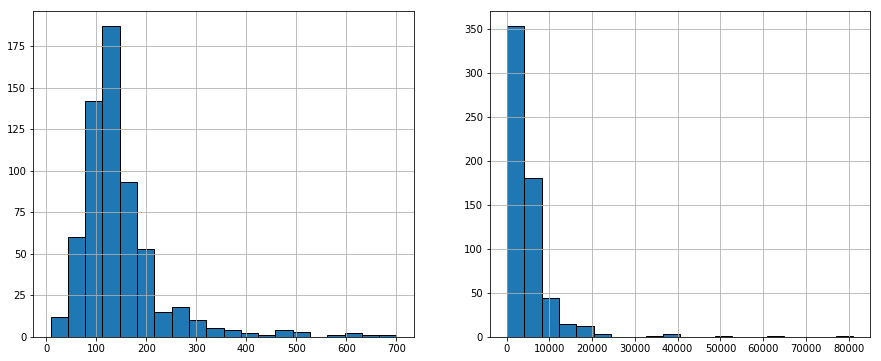

In [23]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
train['LoanAmount'].hist(bins=20,edgecolor='black')
plt.subplot(1,2,2)
train['ApplicantIncome'].hist(bins=20,edgecolor='black')

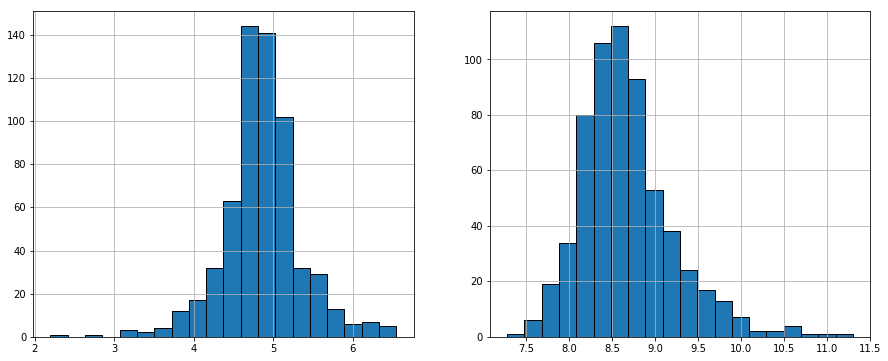

In [24]:
train['TotalIncome']=train['ApplicantIncome']+train['CoapplicantIncome']
train['TotalIncome_log']=np.log(train['TotalIncome'])
train['LoanAmount_log']=np.log(train['LoanAmount'])
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
train['LoanAmount_log'].hist(bins=20,edgecolor='black')
plt.subplot(1,2,2)
train['TotalIncome_log'].hist(bins=20,edgecolor='black')

Since, now we have all non-null values, some of those values are non numeric. In order to use them as a feature in training our machine learning models, we have to convert them into some sort of numeric data. This can be done with the help of LabelEncoder.

In [25]:
from sklearn.preprocessing import LabelEncoder
# will create a list of column names with non numeric data
col_names=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le=LabelEncoder()
for name in col_names:
    train[name]=le.fit_transform(train[name])
train.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
TotalIncome          float64
TotalIncome_log      float64
LoanAmount_log       float64
dtype: object

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

We will create a common funclion in which we can pass objects of various models to test the performances.

In [27]:
def model_fun(model,df,features,target):
    model.fit(df[features],df[target])
    predictions=model.predict(df[features])
    accuracy=metrics.accuracy_score(predictions,df[target])
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))
    cv_score=cross_val_score(model,df[features],df[target],cv=5)
    print ("Cross validation score : %s" % "{0:.3%}".format(np.mean(cv_score)))
    model.fit(df[features],df[target])

In [28]:
#Logistic Regression
target_var='Loan_Status'
model=LogisticRegression()
features_var=['Credit_History']
model_fun(model,train,features_var,target_var)

Accuracy : 80.945%
Cross validation score : 80.957%


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [29]:
features_var=['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area','TotalIncome_log', 'LoanAmount_log']
model_fun(model,train,features_var,target_var)

Accuracy : 80.945%
Cross validation score : 80.957%


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur